# Import Libraries

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
from functools import reduce
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import spearmanr
import statsmodels.api as sm
#import mplcursors
from pylab import rcParams
from matplotlib.backends.backend_agg import FigureCanvasAgg
from math import sqrt

plt.style.use('seaborn-darkgrid')

In [2]:
HealthInsCPSDF = pd.read_csv('COVID_HealthInsCPS.csv', index_col = 0)
HealthInsCPSDF.head()

,State,cases,deaths,Medicare Insurance Costs (2014),Medicaid Insurance Costs (2014),Private Health Insurance Costs (2014)
0,Alabama,26912,785,9723.0,4983.0,11078.0
1,Alaska,751,10,741.0,1359.0,2492.0
2,Arizona,39298,1228,11069.0,8371.0,15073.0
3,Arkansas,13191,188,5536.0,4960.0,6209.0
4,California,159098,5202,64795.0,61761.0,104018.0


In [8]:
HealthInsCPSDF.shape

(51, 8)

In [9]:
HealthInsCPSDF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 0 to 50
Data columns (total 8 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   State                                      51 non-null     object 
 1   cases_x                                    51 non-null     int64  
 2   deaths_x                                   51 non-null     int64  
 3   Medicare Estimates Per State (2014)        51 non-null     float64
 4   Medicaid Estimates Per State (2014)        51 non-null     float64
 5   Private Health Insurance Per State (2014)  51 non-null     float64
 6   cases_y                                    51 non-null     int64  
 7   deaths_y                                   51 non-null     int64  
dtypes: float64(3), int64(4), object(1)
memory usage: 3.6+ KB


In [10]:
HealthInsCPSDF.isnull().sum()

State                                        0
cases_x                                      0
deaths_x                                     0
Medicare Estimates Per State (2014)          0
Medicaid Estimates Per State (2014)          0
Private Health Insurance Per State (2014)    0
cases_y                                      0
deaths_y                                     0
dtype: int64

In [12]:
HealthInsCPSDF.count()

State                                        51
cases_x                                      51
deaths_x                                     51
Medicare Estimates Per State (2014)          51
Medicaid Estimates Per State (2014)          51
Private Health Insurance Per State (2014)    51
cases_y                                      51
deaths_y                                     51
dtype: int64

In [13]:
HealthInsCPSDF.describe()

,cases_x,deaths_x,Medicare Estimates Per State (2014),Medicaid Estimates Per State (2014),Private Health Insurance Per State (2014),cases_y,deaths_y
count,5.100000e+01,5.100000e+01,51.000000,51.000000,51.000000,51.000000,51.000000
mean,1.913979e+06,1.075212e+05,11383.960784,8758.843137,17159.862745,41994.235294,2290.549020
std,3.624095e+06,2.630179e+05,12998.484012,11472.789827,19316.800645,63513.183767,4748.588326
min,3.126800e+04,5.640000e+02,741.000000,534.000000,1928.000000,614.000000,10.000000
25%,3.601770e+05,8.399000e+03,2909.500000,2219.500000,4244.500000,9231.500000,212.000000
50%,7.534540e+05,2.999100e+04,7410.000000,6038.000000,11078.000000,20152.000000,704.000000
75%,2.141316e+06,1.024425e+05,12596.000000,8936.500000,21196.500000,46961.500000,2469.500000
max,2.378046e+07,1.771474e+06,64795.000000,61761.000000,104018.000000,389349.000000,30683.000000


## Pearson Correlation

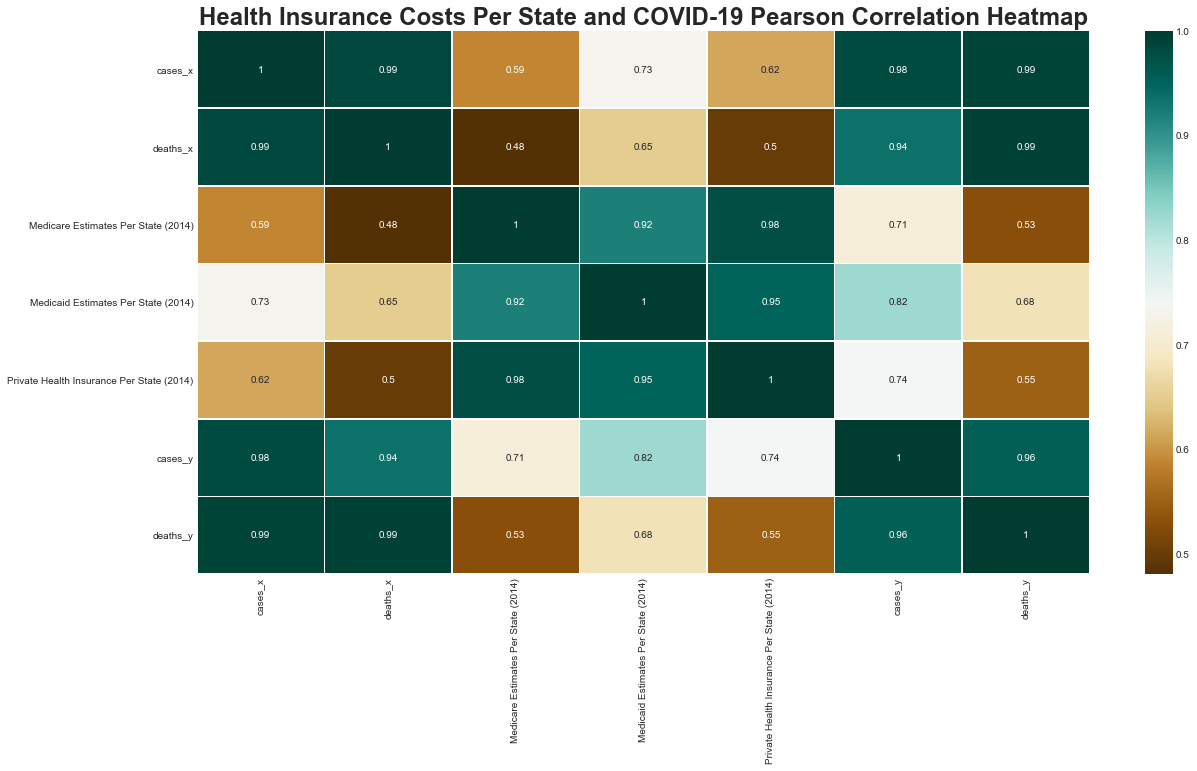

In [14]:
Pcorr = HealthInsCPSDF.corr(method = 'pearson')
Pcorr

plt.figure(figsize = (20,10))
sns.heatmap(Pcorr, cmap = 'BrBG', annot = True, linewidths = 0.5)
plt.title('Health Insurance Costs Per State and COVID-19 Pearson Correlation Heatmap', fontweight = 'bold', fontsize = 24);

## Kendall Correlation

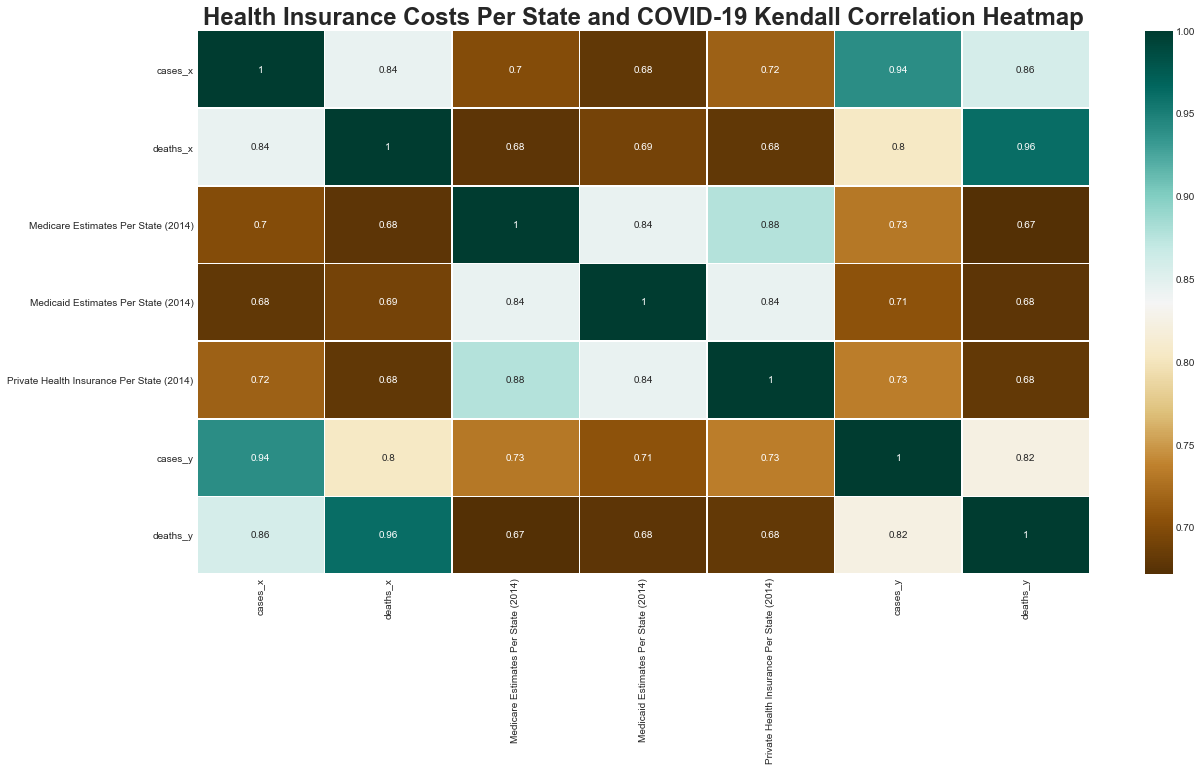

In [15]:
Kcorr = HealthInsCPSDF.corr(method = 'kendall')
Kcorr

plt.figure(figsize = (20,10))
sns.heatmap(Kcorr, cmap = 'BrBG', annot = True, linewidths = 0.5)
plt.title('Health Insurance Costs Per State and COVID-19 Kendall Correlation Heatmap', fontweight = 'bold', fontsize = 24);

## Spearman Correlation

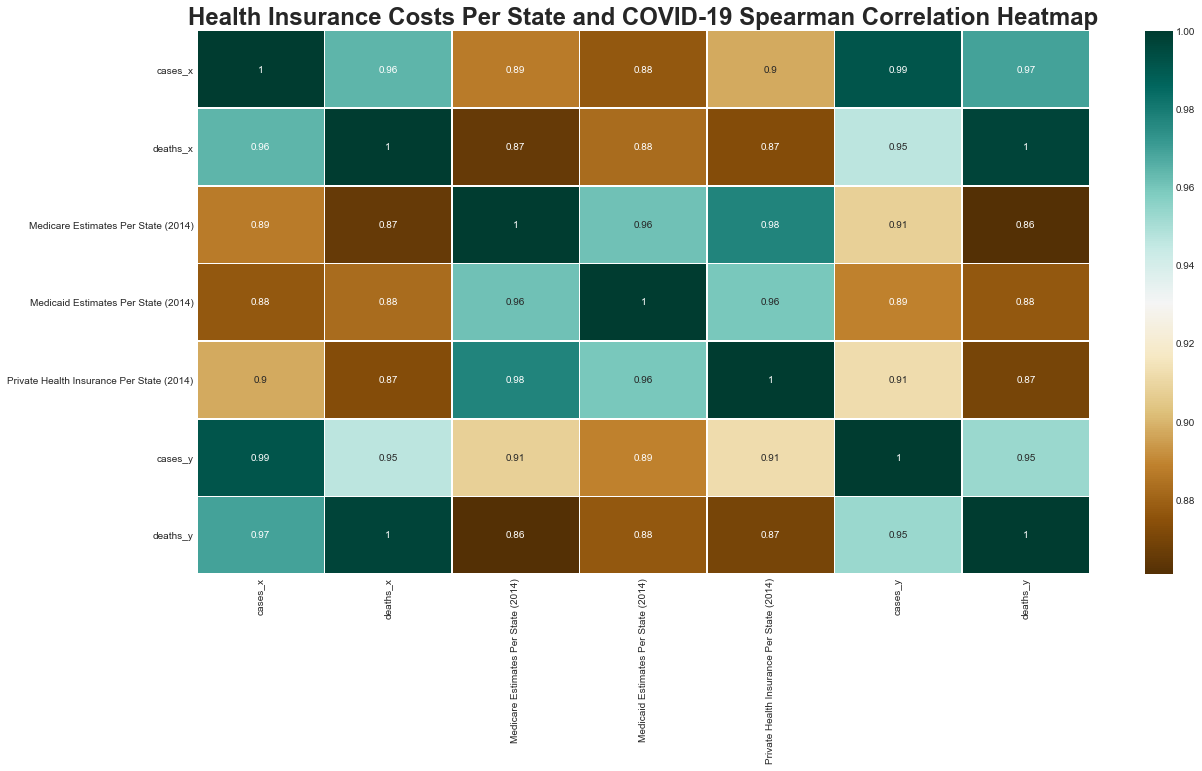

In [16]:
Scorr = HealthInsCPSDF.corr(method = 'spearman')
Scorr

plt.figure(figsize = (20,10))
sns.heatmap(Scorr, cmap = 'BrBG', annot = True, linewidths = 0.5)
plt.title('Health Insurance Costs Per State and COVID-19 Spearman Correlation Heatmap', fontweight = 'bold', fontsize = 24);

In [22]:
AllCorr = pd.DataFrame(Pcorr.index, columns = ['Health Insurance Costs Per State'])

AllCorr['Pearson Correlation'] = list(Pcorr.cases_x)
AllCorr['Kendall Correlation'] = list(Kcorr.cases_x)
AllCorr['Spearman Correlation'] = list(Scorr.cases_x)

AllCorr = AllCorr.drop([0,1,5,6])

AllCorr

,Health Insurance Costs Per State,Pearson Correlation,Kendall Correlation,Spearman Correlation
2,Medicare Estimates Per State (2014),0.589766,0.700392,0.887240
3,Medicaid Estimates Per State (2014),0.733226,0.680000,0.876923
4,Private Health Insurance Per State (2014),0.615976,0.716078,0.897647


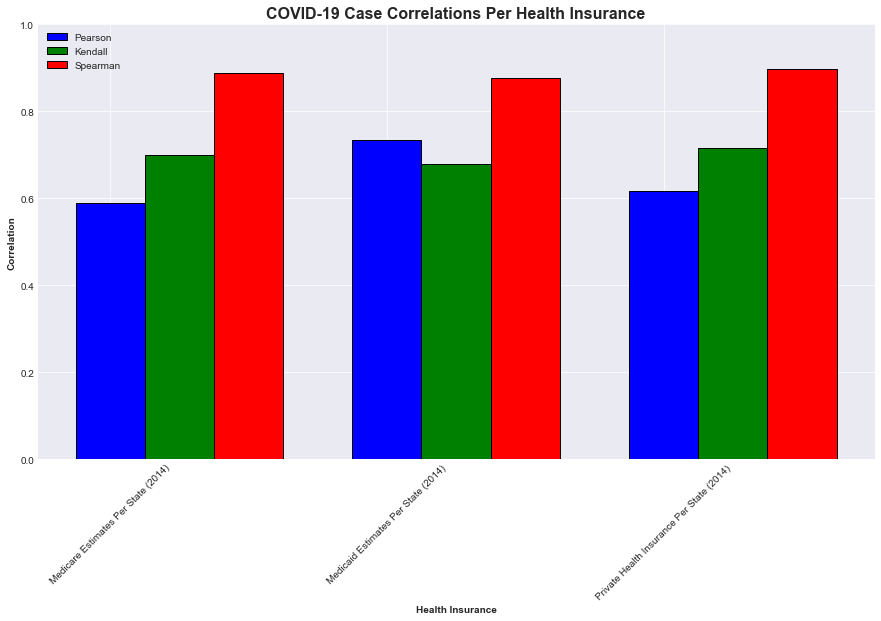

In [23]:
fig = plt.figure(figsize = (15,8))

X = list(AllCorr['Health Insurance Costs Per State'])
PearCorr = list(AllCorr['Pearson Correlation'])
KendCorr = list(AllCorr['Kendall Correlation'])
SpeaCorr = list(AllCorr['Spearman Correlation'])

_X = np.arange(len(X))

plt.bar(_X, PearCorr, 0.25, color = 'blue', edgecolor = 'black')
plt.bar(_X + 0.25, KendCorr, 0.25, color = 'green', edgecolor = 'black')
plt.bar(_X + 0.50, SpeaCorr, 0.25, color = 'red', edgecolor = 'black')

plt.title('COVID-19 Case Correlations Per Health Insurance', fontsize = 16, fontweight = 'bold')

plt.xlabel('Health Insurance', fontsize = 10, fontweight = 'bold')
plt.xticks(_X, X)
plt.xticks(rotation = 45)

plt.ylabel('Correlation', fontsize = 10, fontweight = 'bold')
plt.yticks(np.arange(0, 1.2, step = 0.2))

plt.legend(['Pearson', 'Kendall', 'Spearman'])

plt.show();

## Employer Sponsored Insurance Premium Costs (Single Coverage)

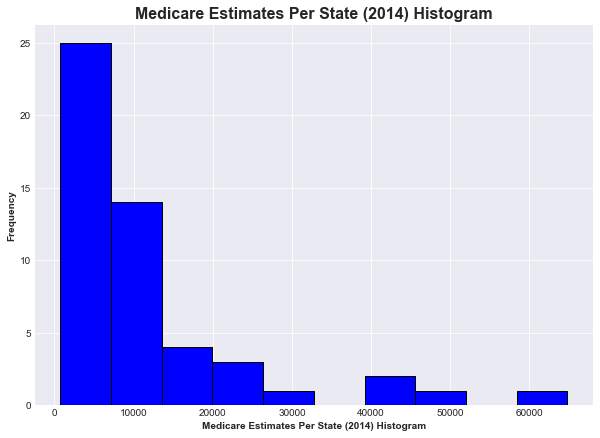

In [24]:
HealthInsCPSDF['Medicare Estimates Per State (2014)'].plot(kind = 'hist', color = 'blue', edgecolor = 'black', figsize = (10,7))
plt.title('Medicare Estimates Per State (2014) Histogram', fontsize = 16, fontweight = 'bold')
plt.xlabel('Medicare Estimates Per State (2014) Histogram', fontsize = 10, fontweight = 'bold')
plt.ylabel('Frequency', fontsize = 10, fontweight = 'bold');

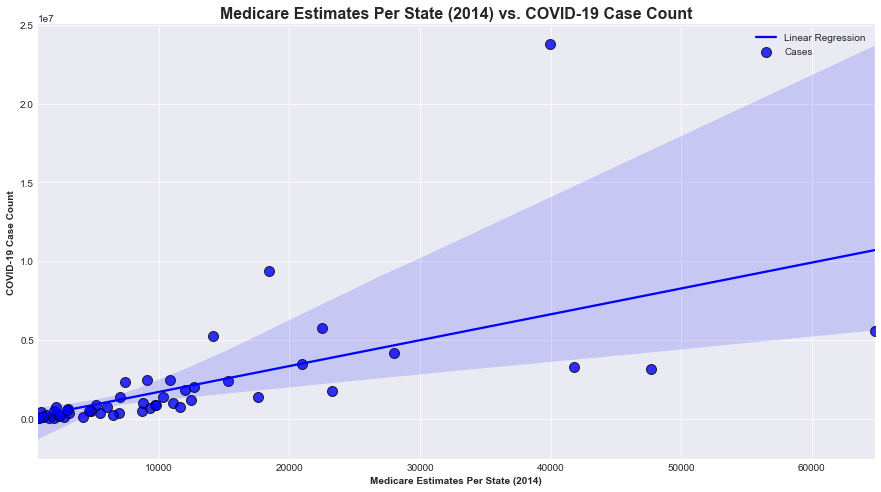

In [26]:
fig = plt.figure(figsize = (15,8))

sns.regplot(x = 'Medicare Estimates Per State (2014)', y = 'cases_x', data = HealthInsCPSDF, color = 'b', scatter_kws = {'linewidths':1, 'edgecolor':'k', 's':100})

plt.title('Medicare Estimates Per State (2014) vs. COVID-19 Case Count', fontsize = 16, fontweight = 'bold')
plt.xlabel('Medicare Estimates Per State (2014)', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Linear Regression', 'Cases'])

plt.show();

In [28]:
model1 = sm.OLS(HealthInsCPSDF['cases_x'], HealthInsCPSDF['Medicare Estimates Per State (2014)']).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                cases_x   R-squared (uncentered):                   0.492
Model:                            OLS   Adj. R-squared (uncentered):              0.482
Method:                 Least Squares   F-statistic:                              48.47
Date:                Sat, 11 Jul 2020   Prob (F-statistic):                    6.89e-09
Time:                        02:32:51   Log-Likelihood:                         -831.22
No. Observations:                  51   AIC:                                      1664.
Df Residuals:                      50   BIC:                                      1666.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Medicare Estimates Per State (2014)   166.0550     23.852      6.962      0.000     118.146     213.964
==============================================================================
Omnibus:                       77.978   Durbin-Watson:                   2.103
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1146.253
Skew:                           4.016   Prob(JB):                    1.24e-249
Kurtosis:                      24.792   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

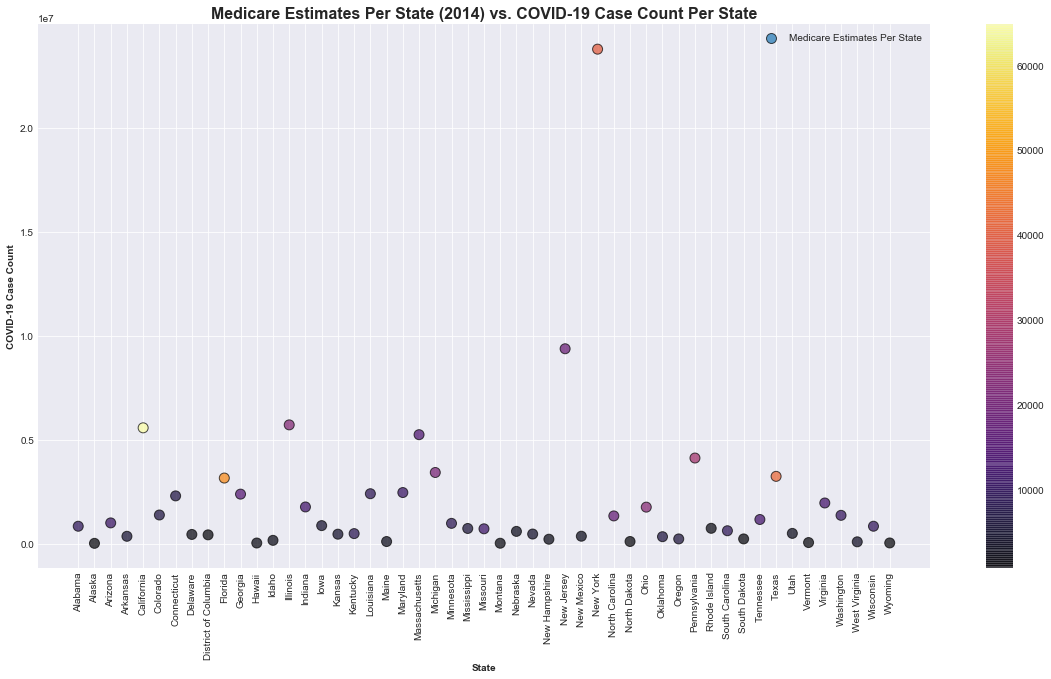

In [29]:
plt.style.use('seaborn-darkgrid')
fig = plt.figure(figsize = (20,10))

x = HealthInsCPSDF['State'] 
y = HealthInsCPSDF['cases_x']

plt.scatter(x, y, linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, 
            c = HealthInsCPSDF['Medicare Estimates Per State (2014)'], cmap = 'inferno')
plt.title('Medicare Estimates Per State (2014) vs. COVID-19 Case Count Per State', fontsize = 16, fontweight = 'bold')
plt.xlabel('State', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Medicare Estimates Per State'])

plt.xticks(rotation = 90)

plt.colorbar()
plt.show();

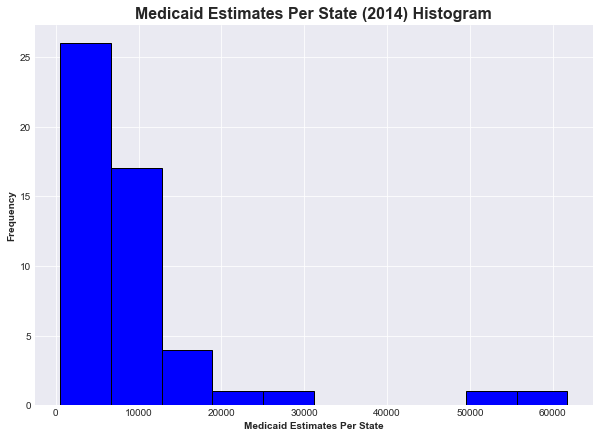

In [30]:
HealthInsCPSDF['Medicaid Estimates Per State (2014)'].plot(kind = 'hist', color = 'blue', edgecolor = 'black', figsize = (10,7))
plt.title('Medicaid Estimates Per State (2014) Histogram', fontsize = 16, fontweight = 'bold')
plt.xlabel('Medicaid Estimates Per State', fontsize = 10, fontweight = 'bold')
plt.ylabel('Frequency', fontsize = 10, fontweight = 'bold');

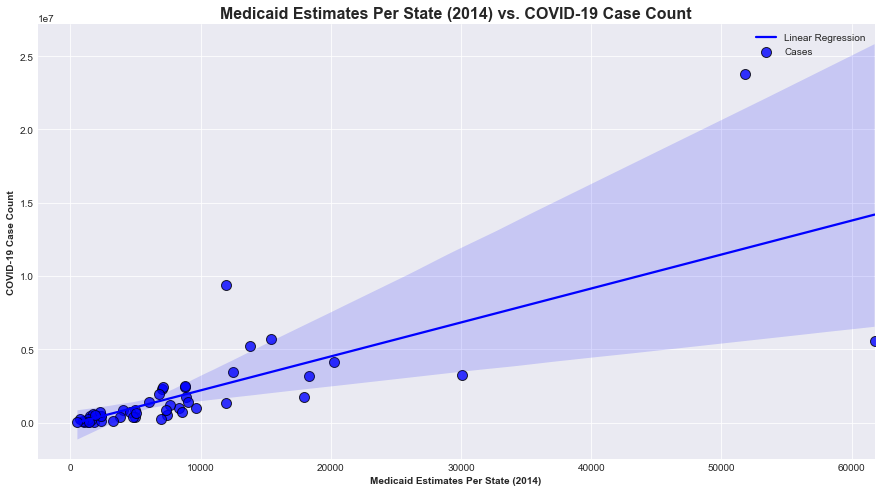

In [31]:
fig = plt.figure(figsize = (15,8))

sns.regplot(x = 'Medicaid Estimates Per State (2014)', y = 'cases_x', 
            data = HealthInsCPSDF, color = 'b', scatter_kws = {'linewidths':1, 'edgecolor':'k', 's':100})

plt.title('Medicaid Estimates Per State (2014) vs. COVID-19 Case Count', 
          fontsize = 16, fontweight = 'bold')
plt.xlabel('Medicaid Estimates Per State (2014)', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Linear Regression', 'Cases'])

plt.show();

In [33]:
model2 = sm.OLS(HealthInsCPSDF['cases_x'], HealthInsCPSDF['Medicaid Estimates Per State (2014)']).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                cases_x   R-squared (uncentered):                   0.640
Model:                            OLS   Adj. R-squared (uncentered):              0.632
Method:                 Least Squares   F-statistic:                              88.71
Date:                Sat, 11 Jul 2020   Prob (F-statistic):                    1.16e-12
Time:                        02:41:55   Log-Likelihood:                         -822.49
No. Observations:                  51   AIC:                                      1647.
Df Residuals:                      50   BIC:                                      1649.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Medicaid Estimates Per State (2014)   226.7330     24.073      9.419      0.000     178.381     275.085
==============================================================================
Omnibus:                       46.192   Durbin-Watson:                   2.088
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              382.074
Skew:                           1.966   Prob(JB):                     1.08e-83
Kurtosis:                      15.819   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

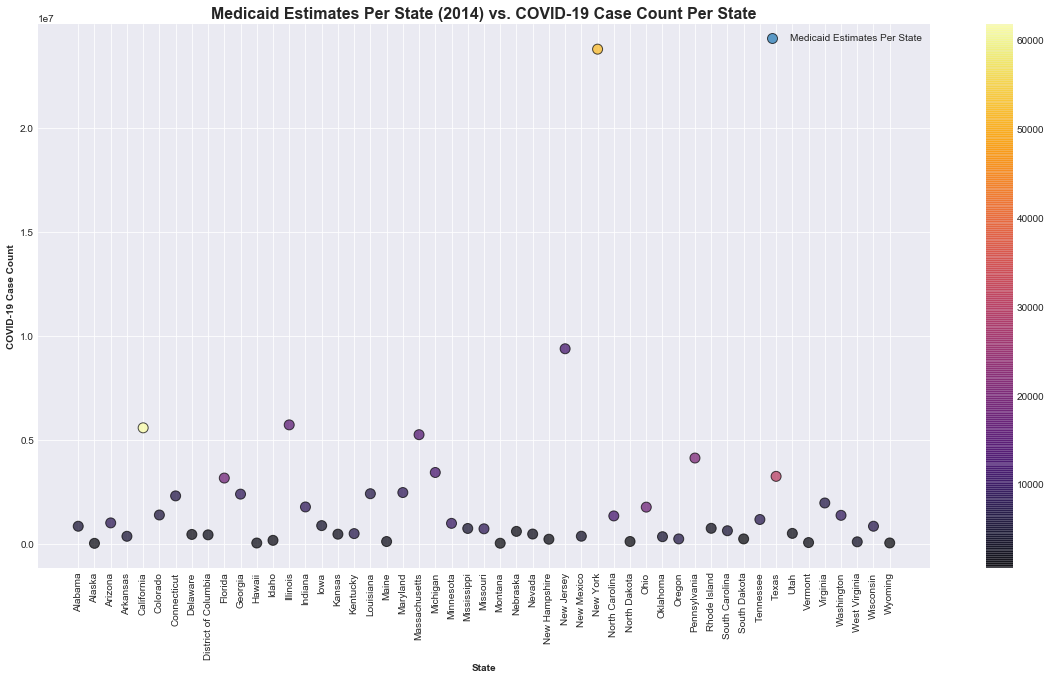

In [34]:
plt.style.use('seaborn-darkgrid')
fig = plt.figure(figsize = (20,10))

x = HealthInsCPSDF['State'] 
y = HealthInsCPSDF['cases_x']

plt.scatter(x, y, linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100,
            c = HealthInsCPSDF['Medicaid Estimates Per State (2014)'], cmap = 'inferno')
plt.title('Medicaid Estimates Per State (2014) vs. COVID-19 Case Count Per State',
          fontsize = 16, fontweight = 'bold')
plt.xlabel('State', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Medicaid Estimates Per State'])

plt.xticks(rotation = 90)

plt.colorbar()
plt.show();

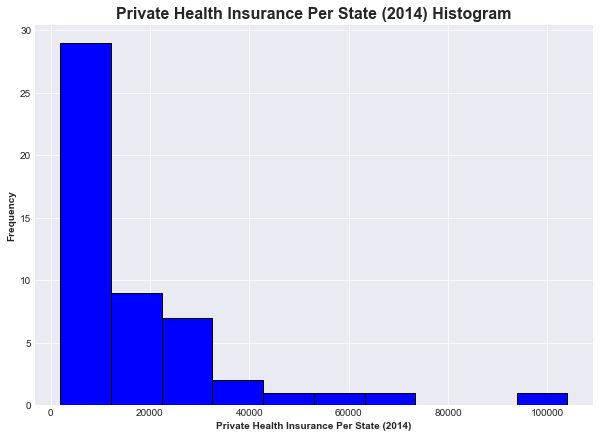

In [35]:
HealthInsCPSDF['Private Health Insurance Per State (2014)'].plot(kind = 'hist', color = 'blue', edgecolor = 'black', figsize = (10,7))
plt.title('Private Health Insurance Per State (2014) Histogram', fontsize = 16, fontweight = 'bold')
plt.xlabel('Private Health Insurance Per State (2014)', fontsize = 10, fontweight = 'bold')
plt.ylabel('Frequency', fontsize = 10, fontweight = 'bold');

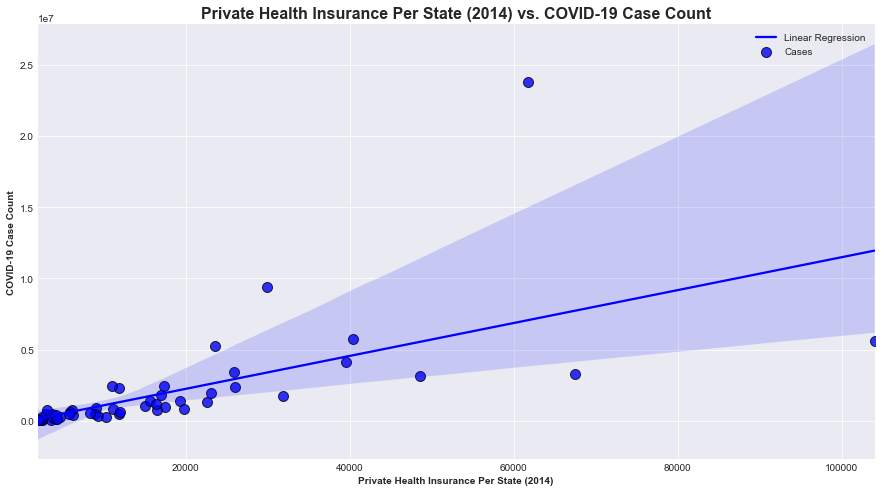

In [36]:
fig = plt.figure(figsize = (15,8))

sns.regplot(x = 'Private Health Insurance Per State (2014)', y = 'cases_x',
            data = HealthInsCPSDF, color = 'b', scatter_kws = {'linewidths':1, 'edgecolor':'k', 's':100})

plt.title('Private Health Insurance Per State (2014) vs. COVID-19 Case Count',
          fontsize = 16, fontweight = 'bold')
plt.xlabel('Private Health Insurance Per State (2014)', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Linear Regression', 'Cases'])

plt.show();

In [37]:
model3 = sm.OLS(HealthInsCPSDF['cases_x'], HealthInsCPSDF['Private Health Insurance Per State (2014)']).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                cases_x   R-squared (uncentered):                   0.517
Model:                            OLS   Adj. R-squared (uncentered):              0.507
Method:                 Least Squares   F-statistic:                              53.46
Date:                Sat, 11 Jul 2020   Prob (F-statistic):                    1.96e-09
Time:                        02:45:59   Log-Likelihood:                         -829.96
No. Observations:                  51   AIC:                                      1662.
Df Residuals:                      50   BIC:                                      1664.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
=============================================================================================================
                                                coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
Private Health Insurance Per State (2014)   113.7694     15.560      7.312      0.000      82.516     145.023
==============================================================================
Omnibus:                       78.346   Durbin-Watson:                   2.040
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1206.346
Skew:                           4.014   Prob(JB):                    1.11e-262
Kurtosis:                      25.433   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

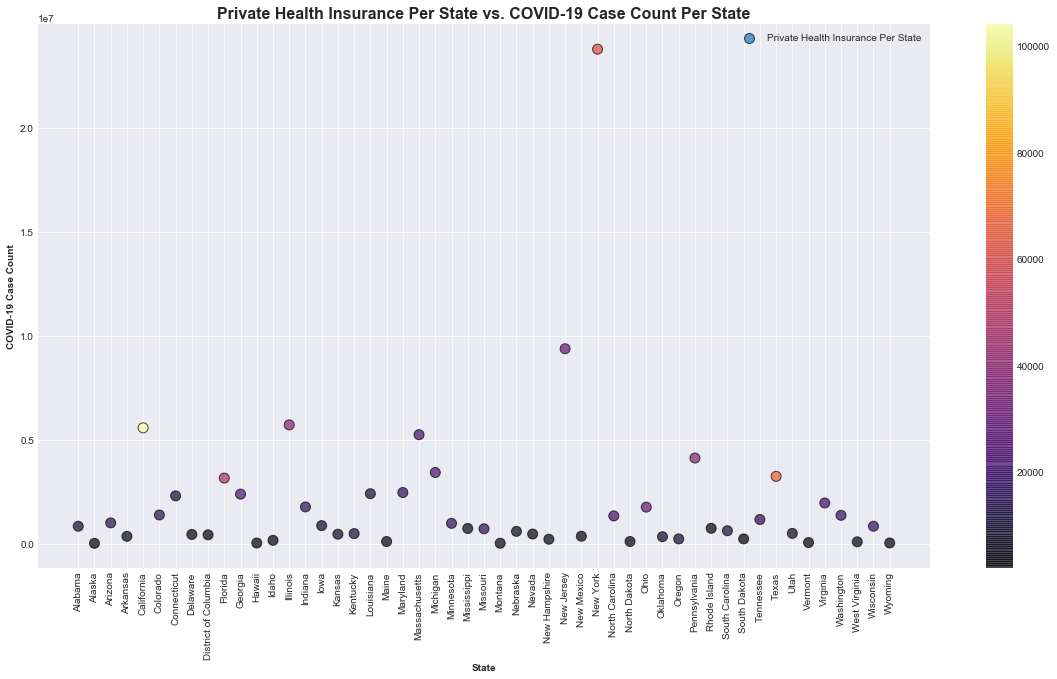

In [39]:
plt.style.use('seaborn-darkgrid')
fig = plt.figure(figsize = (20,10))

x = HealthInsCPSDF['State'] 
y = HealthInsCPSDF['cases_x']

plt.scatter(x, y, linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, 
            c = HealthInsCPSDF['Private Health Insurance Per State (2014)'], cmap = 'inferno')
plt.title('Private Health Insurance Per State vs. COVID-19 Case Count Per State', fontsize = 16,
          fontweight = 'bold')
plt.xlabel('State', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Private Health Insurance Per State'])

plt.xticks(rotation = 90)

plt.colorbar()
plt.show();

In [40]:
model4 = sm.OLS(HealthInsCPSDF['cases_x'], 
                HealthInsCPSDF[['Medicare Estimates Per State (2014)', 
                             'Medicaid Estimates Per State (2014)',
                            'Private Health Insurance Per State (2014)',]]).fit()
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                cases_x   R-squared (uncentered):                   0.689
Model:                            OLS   Adj. R-squared (uncentered):              0.669
Method:                 Least Squares   F-statistic:                              35.42
Date:                Sat, 11 Jul 2020   Prob (F-statistic):                    3.19e-12
Time:                        02:49:05   Log-Likelihood:                         -818.73
No. Observations:                  51   AIC:                                      1643.
Df Residuals:                      48   BIC:                                      1649.
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
=============================================================================================================
                                                coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
Medicare Estimates Per State (2014)           4.3252    117.245      0.037      0.971    -231.411     240.061
Medicaid Estimates Per State (2014)         471.0038     91.976      5.121      0.000     286.073     655.935
Private Health Insurance Per State (2014)  -143.6690     97.602     -1.472      0.148    -339.910      52.572
==============================================================================
Omnibus:                       20.631   Durbin-Watson:                   2.089
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              135.837
Skew:                           0.442   Prob(JB):                     3.19e-30
Kurtosis:                      10.946   Cond. No.                         15.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""